#Contents List
##Import Libraries
##Create Path
##Import orders_products_all_merged_2.pkl
##Drop price_range_loc column in order to redefine the criteria
##If statement with loc() function to define the new price_range column
###The reason there are 4,877 Nans is becasue the outliers priced at 14900 and 99999 were marked as Nans becasue we do not know what the correct value should be. Originally, there were 5127, but with the exclusion flag, some of the 5127 were excluded from the dataframe. 
##Save a palette to a variable:
##Create a bar chart from the price_range column
##Create a scatter plot of the orders_day_of_week to the busiest day column
##Create a scatter plot of the busiest day to the busiest_period_of_day
##Create a scatter plot of the hour_of_day_ordered to the busiest_period_of_day
##Create a scatter plot of the max_order to price_range
##Create a scatter plot of the max_order to busiest day
##Create a scatter plot of the max_order to busiest_period_of_day
##Create a scatter plot of the max_order to average_price
##Create a scatter plot of the income-group to age-group
##Create a bar chart from the income-group column
###Create a boxplot to show the correlation between income to family_status
###Create a boxplot to show the correlation between prices to department_name
###Create a boxplot to show the correlation between income to age_group
##Create a scatter plot of the family_status to department_name
##Create a scatter plot of spending_flag to hour_of_day_ordered
##Create a scatter plot of department_name to price_range
##Create a scatter plot of department_name to frequency_flag

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Instacart Basket Analysis'

In [3]:
#Import orders_products_all_merged_2.pkl
df_ords_prods_all_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_merged_2.pkl'))

In [4]:
pd.options.display.max_columns=None

In [5]:
df_ords_prods_all_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since prior_order,frequency_flag,Gender,State,Age,Number_of_Dependants,Familial_Status,income,Region,exclusion_flag,age-group,income-group,family_status,department_name,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants


In [6]:
df_ords_prods_all_merged.shape

(30964564, 35)

In [7]:
pd.reset_option('display.max_columns')

In [8]:
#Drop price_range_loc column in order to redefine the criteria
df_ords_prods_all_merged = df_ords_prods_all_merged.drop(columns = ['price_range_loc'])

In [9]:
#If statement with loc() function to define the new price_range column
df_ords_prods_all_merged.loc[df_ords_prods_all_merged['prices'] > 10, 'price_range'] = 'High-range product'

In [10]:
df_ords_prods_all_merged.loc[(df_ords_prods_all_merged['prices'] <= 10) & (df_ords_prods_all_merged['prices'] > 5), 'price_range'] = 'Mid-range product'

In [11]:
df_ords_prods_all_merged.loc[df_ords_prods_all_merged['prices'] <= 5, 'price_range'] = 'Low-range product'

In [12]:
df_ords_prods_all_merged['price_range'].value_counts(dropna=False)

price_range
Mid-range product     11244050
High-range product    10040797
Low-range product      9674840
nan                       4877
Name: count, dtype: int64

##The reason there are 4,877 Nans is becasue the outliers priced at 14900 and 99999 were marked as Nans becasue we do not know what the correct value should be. Originally, there were 5127, but with the exclusion flag, some of the 5127 were excluded from the dataframe. 

In [13]:
pd.options.display.max_columns=None

In [14]:
df_ords_prods_all_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since prior_order,frequency_flag,Gender,State,Age,Number_of_Dependants,Familial_Status,income,Region,exclusion_flag,age-group,income-group,family_status,department_name,customer_profile,price_range
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants,Mid-range product
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants,Mid-range product
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants,Mid-range product
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants,Mid-range product
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,regular customer,young adult,lowest income,married with dependants,beverages,young married adult lowest income with dependants,Mid-range product


In [15]:
df_ords_prods_all_merged.shape

(30964564, 35)

In [16]:
pd.reset_option('display.max_columns')

In [17]:
# Save a palette to a variable:
palette = sns.color_palette('Greens_r', 10)

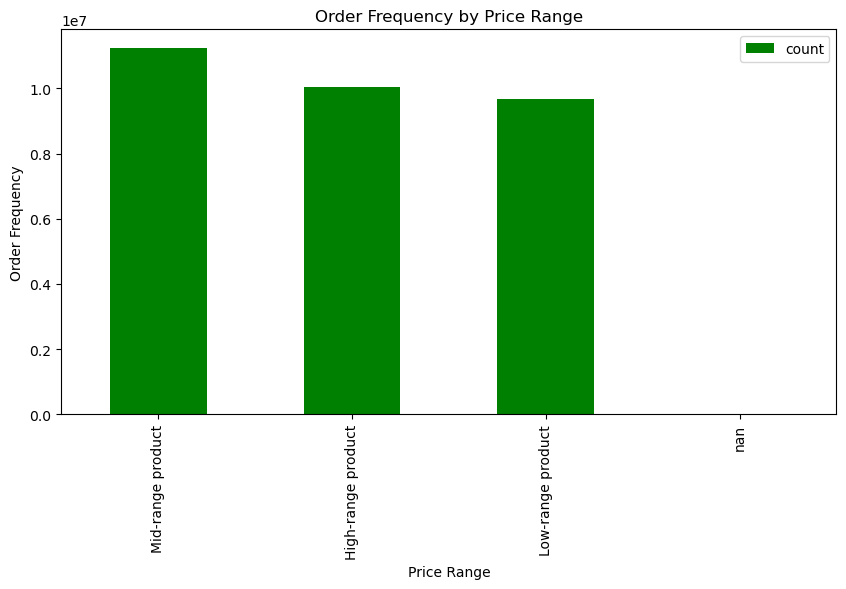

In [18]:
#Create a bar chart from the price_range column
fig = plt.figure(figsize=(10,5))
bar_price_range = df_ords_prods_all_merged['price_range'].value_counts().plot.bar(color=['green'])
plt.xlabel('Price Range')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Price Range')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


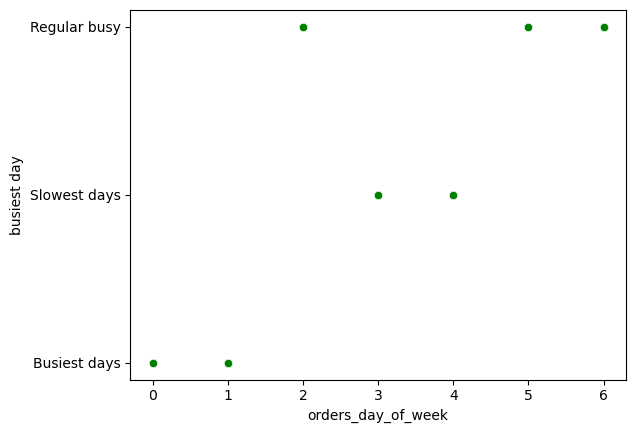

In [19]:
#Create a scatter plot of the orders_day_of_week to the busiest day column
scatterplot_orders_day_of_week_to_busiest_day = sns.scatterplot(x = 'orders_day_of_week', y = 'busiest day', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

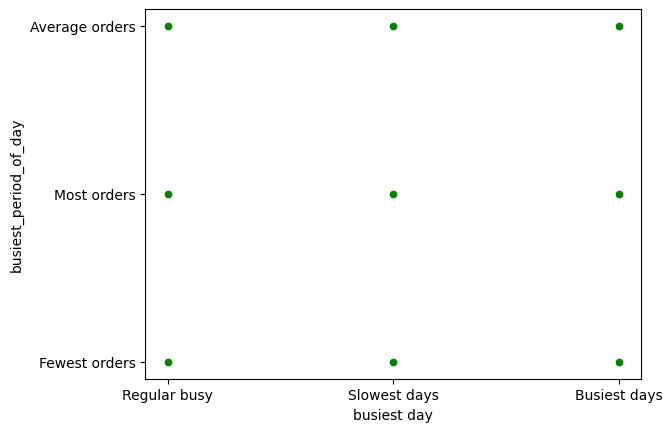

In [20]:
#Create a scatter plot of the busiest day to the busiest_period_of_day
scatterplot_busiest_day_to_busiest_period_of_day = sns.scatterplot(x = 'busiest day', y = 'busiest_period_of_day', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


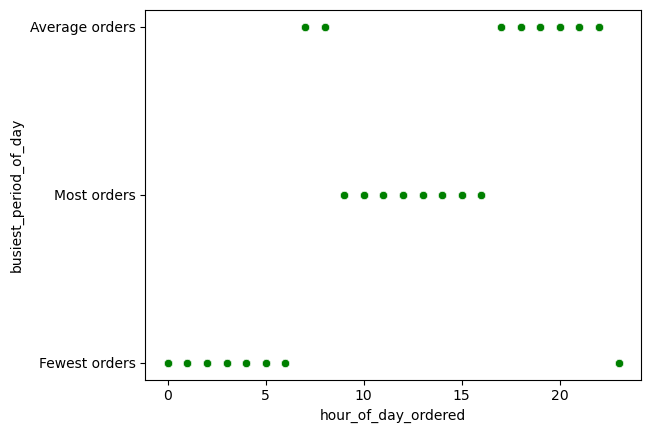

In [21]:
#Create a scatter plot of the hour_of_day_ordered to the busiest_period_of_day
scatterplot_hour_ordered_to_busiest_period_of_day = sns.scatterplot(x = 'hour_of_day_ordered', y = 'busiest_period_of_day', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


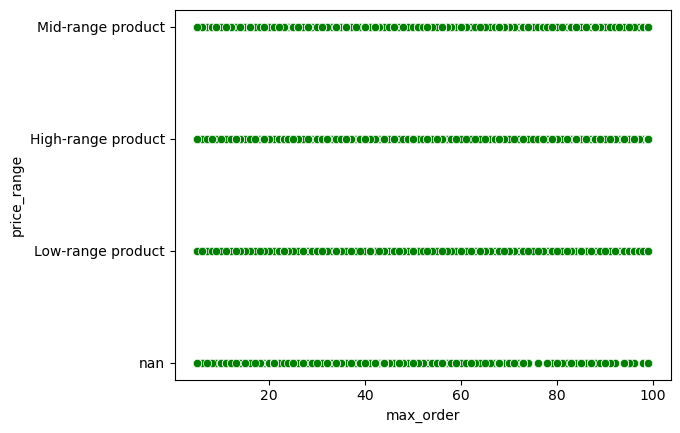

In [22]:
#Create a scatter plot of the max_order to price_range
scatterplot_max_order_to_price_range = sns.scatterplot(x = 'max_order', y = 'price_range', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


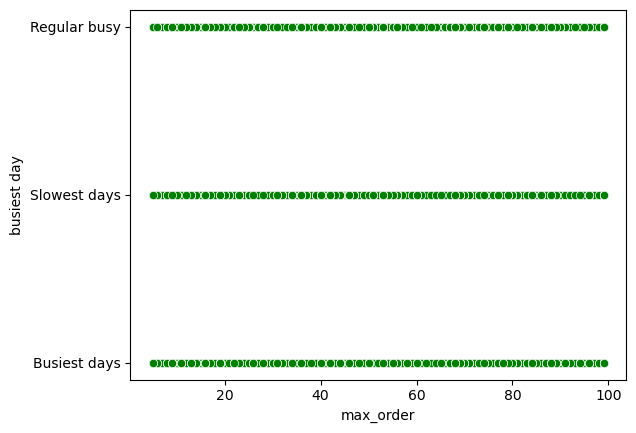

In [23]:
#Create a scatter plot of the max_order to busiest day
scatterplot_max_order_to_busiest_day = sns.scatterplot(x = 'max_order', y = 'busiest day', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


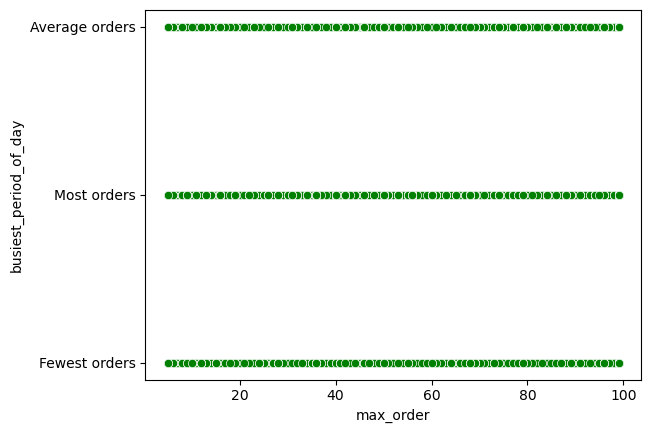

In [24]:
#Create a scatter plot of the max_order to busiest_period_of_day
scatterplot_max_order_to_busiest_period = sns.scatterplot(x = 'max_order', y = 'busiest_period_of_day', data = df_ords_prods_all_merged, color='green')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


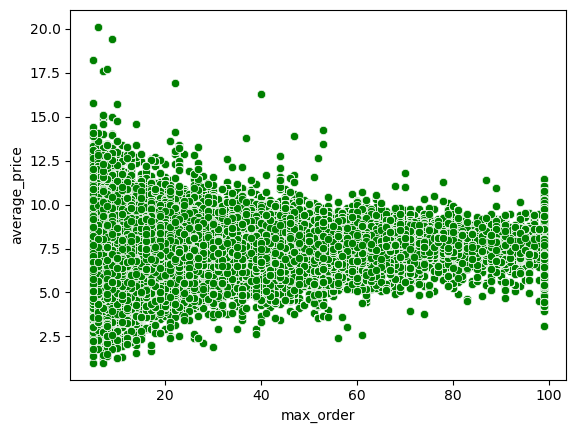

In [25]:
#Create a scatter plot of the max_order to average_price
scatterplot_max_order_to_average_price = sns.scatterplot(x = 'max_order', y = 'average_price', data = df_ords_prods_all_merged, color='green')

In [26]:
df_ords_prods_all_merged.describe()

,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,add_to_cart_order,reordered,aisle_id,prices,max_order,average_price,median_days_since prior_order,Age,Number_of_Dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,7.118859e+01,7.790590e+00,3.442569e+01,7.790592e+00,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,3.822194e+01,4.240595e+00,2.489504e+01,7.216696e-01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,3.100000e+01,4.200000e+00,1.400000e+01,7.385130e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,8.300000e+01,7.400000e+00,2.800000e+01,7.812245e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,1.070000e+02,1.130000e+01,4.800000e+01,8.224106e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,1.340000e+02,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [27]:
df_ords_prods_all_merged['average_price'].min()

1.0

In [28]:
df_ords_prods_all_merged['average_price'].max()

20.114285714285717

In [29]:
df_ords_prods_all_merged['average_price'].median()

7.812244897959184

In [30]:
df_ords_prods_all_merged['average_price'].mean()

7.790592052078364

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

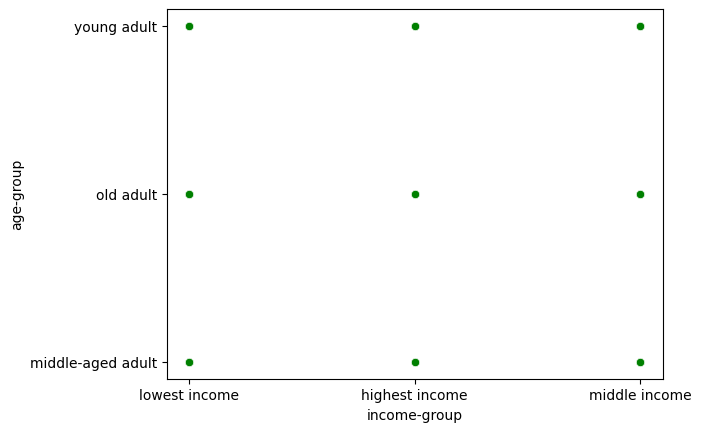

In [31]:
#Create a scatter plot of the income-group to age-group
scatterplot_max_order_to_average_price = sns.scatterplot(x = 'income-group', y = 'age-group', data = df_ords_prods_all_merged, color='green')

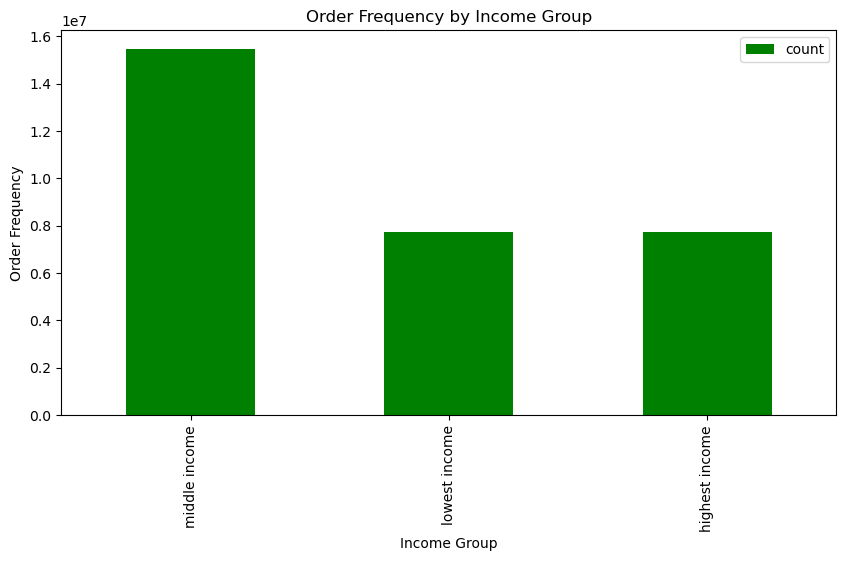

In [32]:
#Create a bar chart from the income-group column
fig = plt.figure(figsize=(10,5))
bar_price_range = df_ords_prods_all_merged['income-group'].value_counts().plot.bar(color=['green'])
plt.xlabel('Income Group')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Income Group')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

##Create a boxplot to show the correlation between income to family_status

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Family Computer\AppData\Local\Temp\ipykernel_8524\1143163542.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a

[Text(-100000.0, 0, '−100000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100000'),
 Text(200000.0, 0, '200000'),
 Text(300000.0, 0, '300000'),
 Text(400000.0, 0, '400000'),
 Text(500000.0, 0, '500000'),
 Text(600000.0, 0, '600000'),
 Text(700000.0, 0, '700000')]

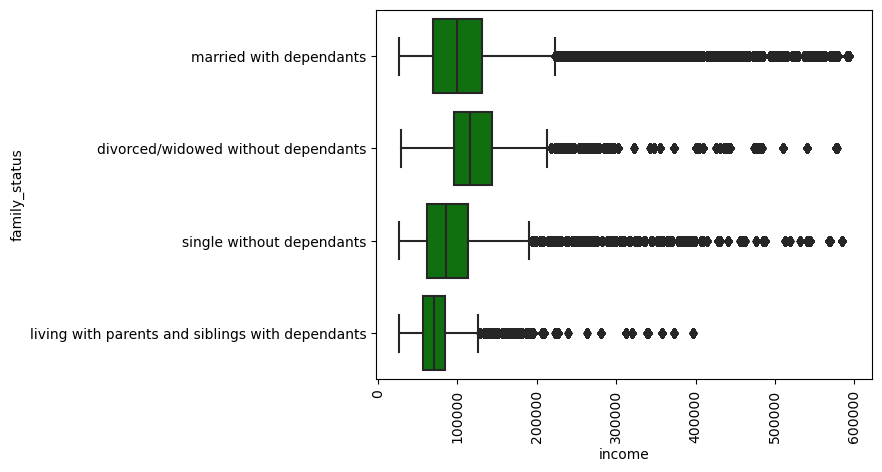

In [33]:
ax = sns.boxplot(data=df_ords_prods_all_merged, x='income', y='family_status', color='green')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

##Create a boxplot to show the correlation between prices to department_name

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


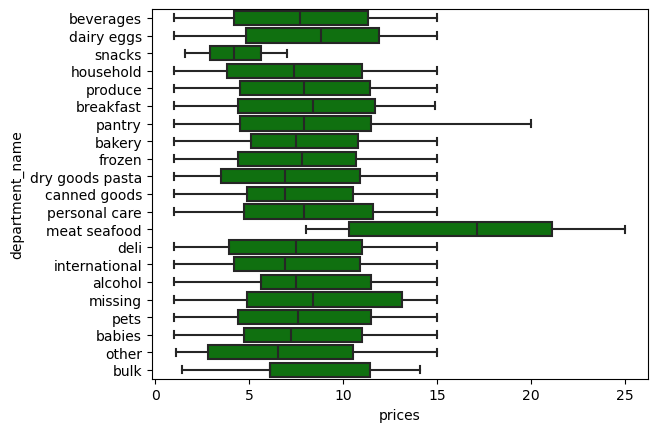

In [34]:
ax_2 = sns.boxplot(data=df_ords_prods_all_merged, x='prices', y='department_name', color='green')

##Create a boxplot to show the correlation between income to age_group

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Family Computer\AppData\Local\Temp\ipykernel_8524\2966763952.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_3.set_xticklabels

[Text(-100000.0, 0, '−100000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100000'),
 Text(200000.0, 0, '200000'),
 Text(300000.0, 0, '300000'),
 Text(400000.0, 0, '400000'),
 Text(500000.0, 0, '500000'),
 Text(600000.0, 0, '600000'),
 Text(700000.0, 0, '700000')]

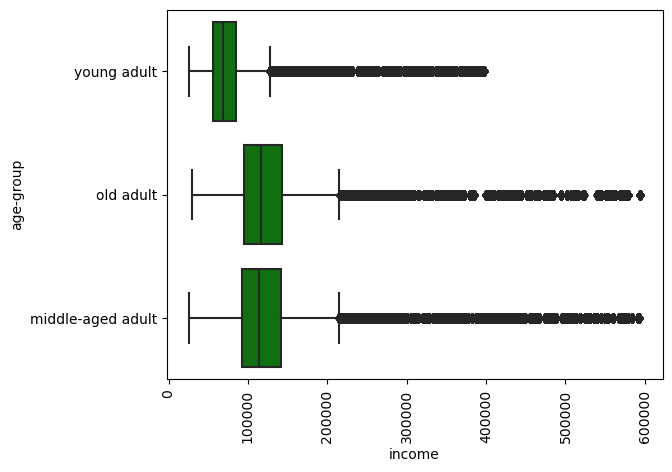

In [35]:
ax_3 = sns.boxplot(data=df_ords_prods_all_merged, x='income', y='age-group', color='green')
ax_3.set_xticklabels(ax_3.get_xticklabels(),rotation=90)

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

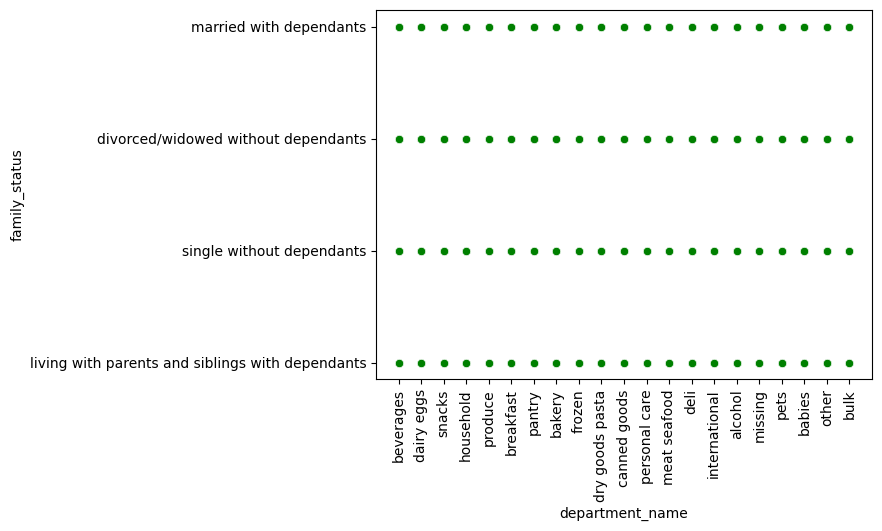

In [36]:
#Create a scatter plot of the family_status to department_name
scatterplot_family_status_department = sns.scatterplot(x = 'department_name', y = 'family_status', data = df_ords_prods_all_merged, color='green')
scatterplot_family_status_department.tick_params(axis='x', rotation=90)


D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


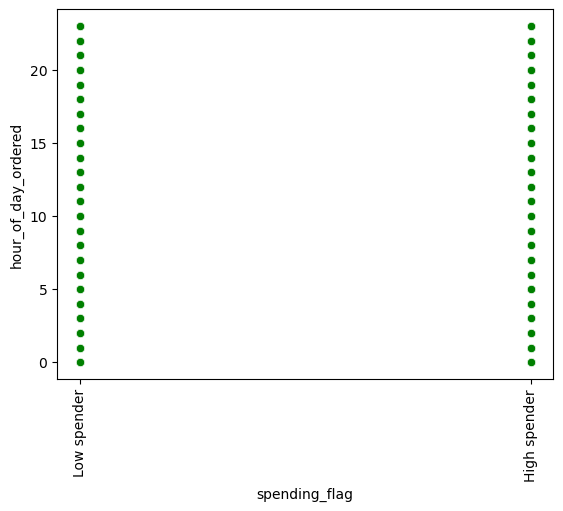

In [38]:
#Create a scatter plot of spending_flag to hour_of_day_ordered
scatterplot_spending_to_hour = sns.scatterplot(x = 'spending_flag', y = 'hour_of_day_ordered', data = df_ords_prods_all_merged, color='green')
scatterplot_spending_to_hour.tick_params(axis='x', rotation=90)

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

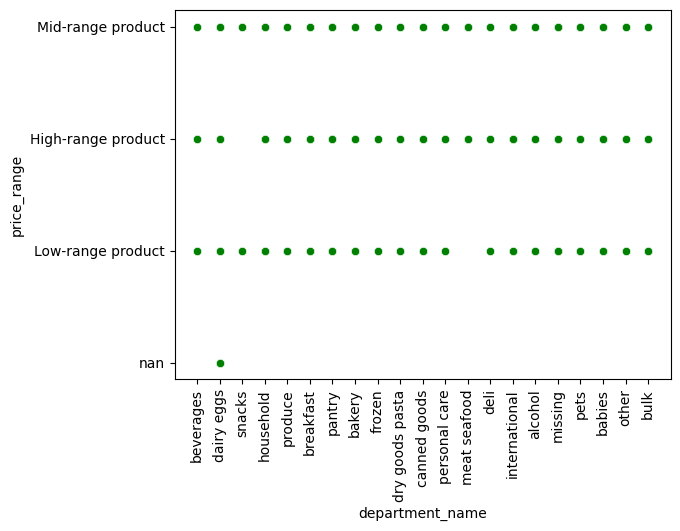

In [39]:
#Create a scatter plot of department_name to price_range
scatterplot_department_to_price_range = sns.scatterplot(x = 'department_name', y = 'price_range', data = df_ords_prods_all_merged, color='green')
scatterplot_department_to_price_range.tick_params(axis='x', rotation=90)

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

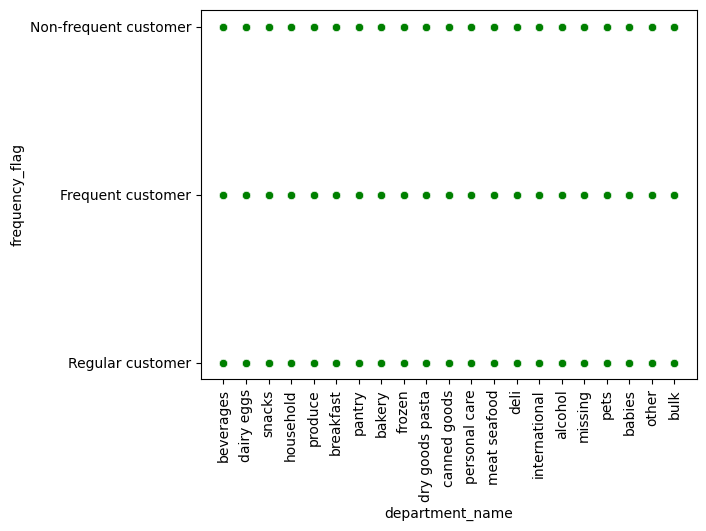

In [40]:
#Create a scatter plot of department_name to frequency_flag
scatterplot_department_to_frequency = sns.scatterplot(x = 'department_name', y = 'frequency_flag', data = df_ords_prods_all_merged, color='green')
scatterplot_department_to_frequency.tick_params(axis='x', rotation=90)